<a href="https://colab.research.google.com/github/mg-regina/Programacion/blob/main/PROYECTO_No2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Model: Logistic Regression
Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       305
           1       0.90      0.86      0.88       194

    accuracy                           0.91       499
   macro avg       0.91      0.90      0.90       499
weighted avg       0.91      0.91      0.91       499


Model: k-Nearest Neighbors
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.83      0.97      0.90       305
           1       0.94      0.70      0.80       194

    accuracy                           0.86       499
   macro avg       0.89      0.83      0.85       499
weighted avg       0.87      0.86      0.86       499


Model: Support Vector Machine
Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       305
           1       0.00      0.00      0.00       194

    accuracy                           0.61       4

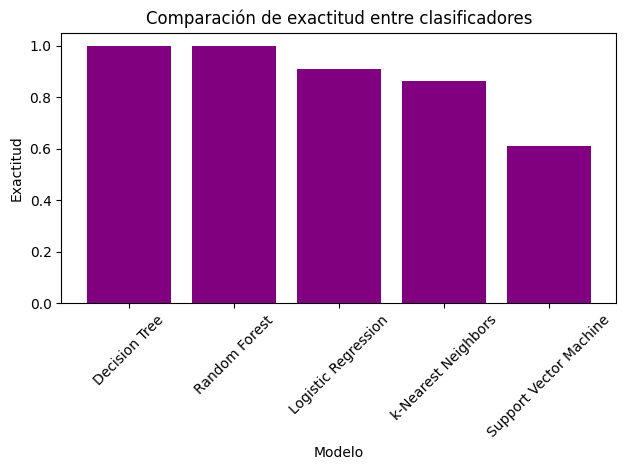

El mejor clasificador es:Decision Tree con una exactitud de1.00


In [10]:
# Martínez Garduño Regina

# Se ocupo el doc .xlsx

# Utilizaremos la paquetería sklearn

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

class Clasificadores:
    def __init__(self, train_file, test_file):
        """
        Inicializa la clase Clasificadores, cargando los datos de entrenamiento
        y prueba desde los archivos .xlsx.
        """
        self.train_data = pd.read_excel(train_file)
        self.test_data = pd.read_excel(test_file)
        self.models = {
            "Logistic Regression": LogisticRegression(),
            "k-Nearest Neighbors": KNeighborsClassifier(),
            "Support Vector Machine": SVC(),
            "Decision Tree": DecisionTreeClassifier(),
            "Random Forest": RandomForestClassifier()
        }
        self.results = {}

    def preprocess_data(self):
        """
        Divide los datos en características (X) y etiquetas (y), y luego en
        conjuntos de entrenamiento y validación.
        """

        # Convertir la columna 'diagnosis' a valores numéricos (0 y 1)
        self.train_data['diagnosis'] = self.train_data['diagnosis'].map({'M': 1,
                                                                         'B': 0})
        self.test_data['diagnosis'] = self.test_data['diagnosis'].map({'M': 1,
                                                                       'B': 0})

        X_train = self.train_data.drop(columns=['diagnosis']).values
        y_train = self.train_data['diagnosis'].values
        X_test = self.test_data.drop(columns=['diagnosis']).values
        y_test = self.test_data['diagnosis'].values
        return X_train, X_test, y_train, y_test

    def train_and_evaluate(self):
        """
        Entrena y evalúa cada clasificador, guardando resultados en el atributo
        results.
        """
        X_train, X_test, y_train, y_test = self.preprocess_data()
        for name, model in self.models.items():
            try:
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                accuracy = accuracy_score(y_test, y_pred)
                report = classification_report(y_test, y_pred)
                conf_matrix = confusion_matrix(y_test, y_pred)

                # Guardar resultados
                self.results[name] = {
                    "accuracy": accuracy,
                    "classification_report": report,
                    "confusion_matrix": conf_matrix
                }

                print(f"Model: {name}")
                print(f"Accuracy: {accuracy:.2f}")
                print(report)
                print()

            except Exception as e:
                print(f"Error entrenando el modelo {name}: {e}")

    def compare_models(self):
        """
        Compara los clasificadores mediante gráficas y métricas.
        """
        accuracies = {name: result["accuracy"] for name, result in
                                        self.results.items()}
        sorted_accuracies = dict(sorted(accuracies.items(), key=lambda item:
                                        item[1], reverse=True))

        plt.bar(sorted_accuracies.keys(), sorted_accuracies.values(),
                                        color='purple')
        plt.title("Comparación de exactitud entre clasificadores")
        plt.ylabel("Exactitud")
        plt.xlabel("Modelo")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        best_model = max(accuracies, key=accuracies.get)
        print(f"El mejor clasificador es:{best_model} con una exactitud de{accuracies[best_model]:.2f}")
if __name__ == "__main__":
    try:
        # Cargar archivos en formato .xlsx
        train_file = "/content/cancer.xlsx"
        test_file = "/content/cancer.xlsx"

        clasificador = Clasificadores(train_file, test_file)
        clasificador.train_and_evaluate()
        clasificador.compare_models()
    except Exception as e:
        print(f"Error en la ejecución del programa: {e}")